In [1]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.6 MB/s eta 0:00:00


In [2]:
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math
from matplotlib import pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Crude oil.csv to Crude oil.csv


In [4]:
df = pd.read_csv("Crude oil.csv")
df

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63
...,...,...,...,...,...,...
2543,11/05/2012,85.65,185846.0,84.65,85.90,84.34
2544,11/02/2012,84.86,273619.0,86.91,87.24,84.66
2545,11/01/2012,87.09,185097.0,86.10,87.42,85.92
2546,10/31/2012,86.24,192354.0,85.73,87.19,85.61


# 1. EDA

In [ ]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63


In [ ]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
2543,11/05/2012,85.65,185846.0,84.65,85.90,84.34
2544,11/02/2012,84.86,273619.0,86.91,87.24,84.66
2545,11/01/2012,87.09,185097.0,86.10,87.42,85.92
2546,10/31/2012,86.24,192354.0,85.73,87.19,85.61
2547,10/30/2012,85.68,NaN,85.68,85.68,85.68


In [ ]:
df.describe()

,Close/Last,Volume,Open,High,Low
count,2548.000000,2.517000e+03,2548.000000,2548.000000,2548.000000
mean,66.043740,3.954717e+05,66.042500,66.959839,65.065043
std,22.732093,2.345385e+05,22.710749,22.820487,22.565127
min,-37.630000,1.530000e+02,-37.250000,-35.200000,-40.320000
25%,48.620000,2.244770e+05,48.665000,49.317500,47.800000
50%,59.720000,3.638160e+05,59.770000,60.545000,58.850000
75%,87.467500,5.581500e+05,87.450000,88.695000,86.342500
max,123.700000,1.693652e+06,124.580000,129.440000,120.790000


In [ ]:
df.max()

Date          12/31/2021
Close/Last         123.7
Volume         1693652.0
Open              124.58
High              129.44
Low               120.79
dtype: object

In [ ]:
df.min()

Date          01/01/2013
Close/Last        -37.63
Volume             153.0
Open              -37.25
High               -35.2
Low               -40.32
dtype: object

In [ ]:
df.info()

# 2548 rows and 6 columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2548 non-null   object 
 1   Close/Last  2548 non-null   float64
 2   Volume      2517 non-null   float64
 3   Open        2548 non-null   float64
 4   High        2548 non-null   float64
 5   Low         2548 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.6+ KB


In [ ]:
df.isnull().sum()

# 31 null values present in the Volume column

Date           0
Close/Last     0
Volume        31
Open           0
High           0
Low            0
dtype: int64

In [5]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [6]:
df.duplicated().sum()

# No duplicate values present in the dataset

0

In [7]:
duplicate_data = df[df.duplicated()]
duplicate_data

,Date,Close/Last,Volume,Open,High,Low


In [ ]:
df.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [ ]:
df.Date

0       10/28/2022
1       10/27/2022
2       10/26/2022
3       10/25/2022
4       10/24/2022
           ...    
2542    11/06/2012
2543    11/05/2012
2544    11/02/2012
2545    11/01/2012
2546    10/31/2012
Name: Date, Length: 2517, dtype: object

In [ ]:
df.dtypes

# Data type of all the columns is float

Date           object
Close/Last    float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object

# 2. Data Visualization

- Visualizing Full Data as a line plot

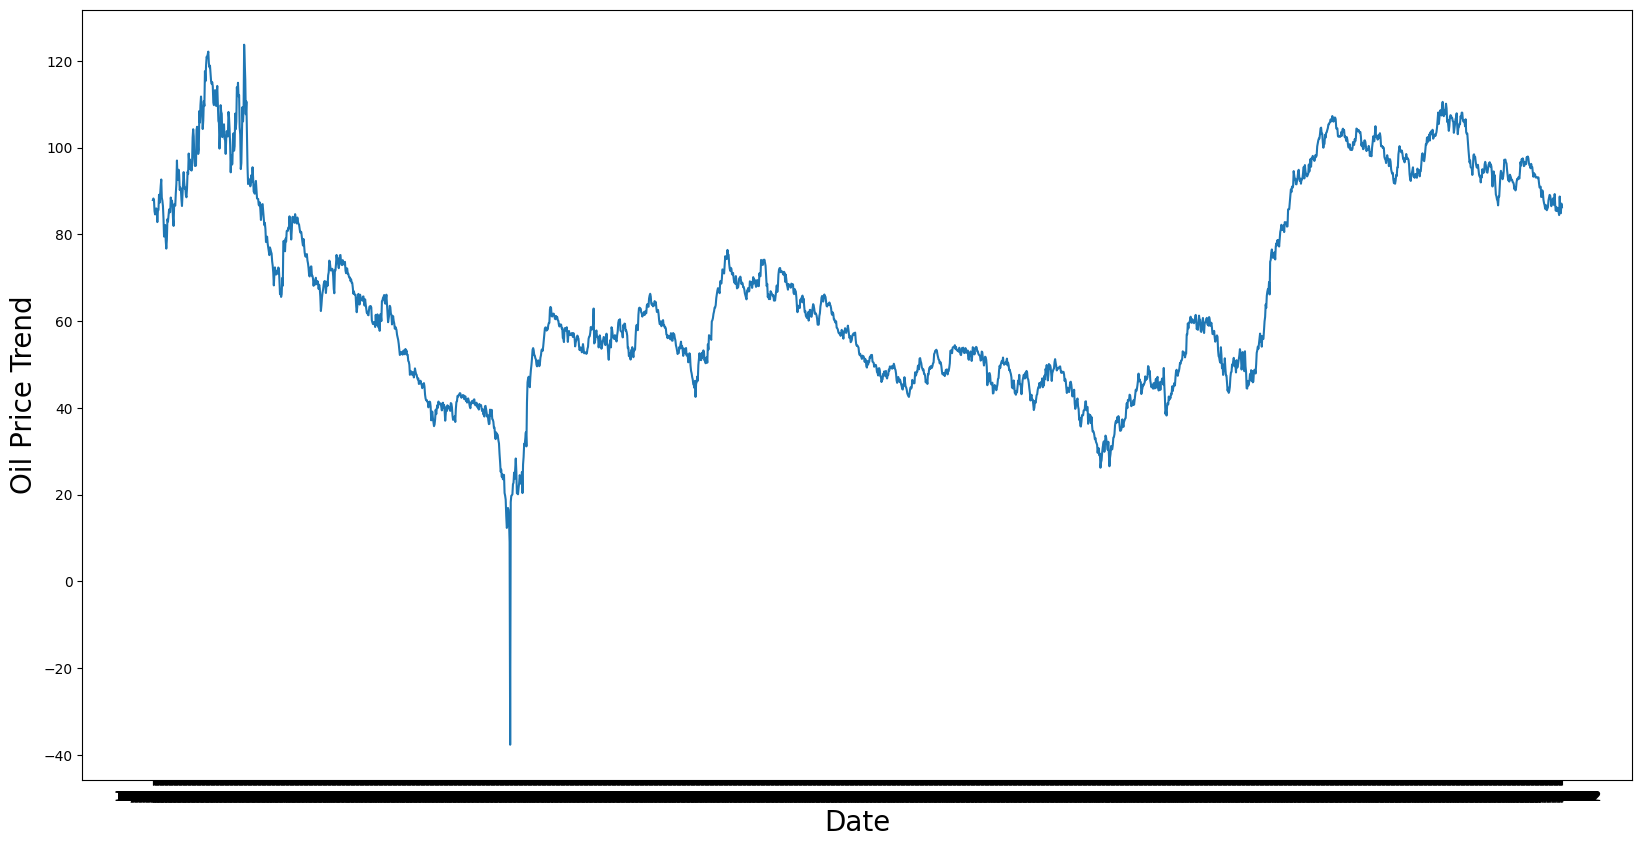

In [8]:
x = df['Date']
y = df['Close/Last']

plt.figure(figsize = (20, 10))

plt.plot(x, y)
plt.ylabel('Oil Price Trend', fontsize = 20)
plt.xlabel('Date', fontsize = 20)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

(array([   0,    1,    2, ..., 2514, 2515, 2516]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(45, 0, '45'),
  T

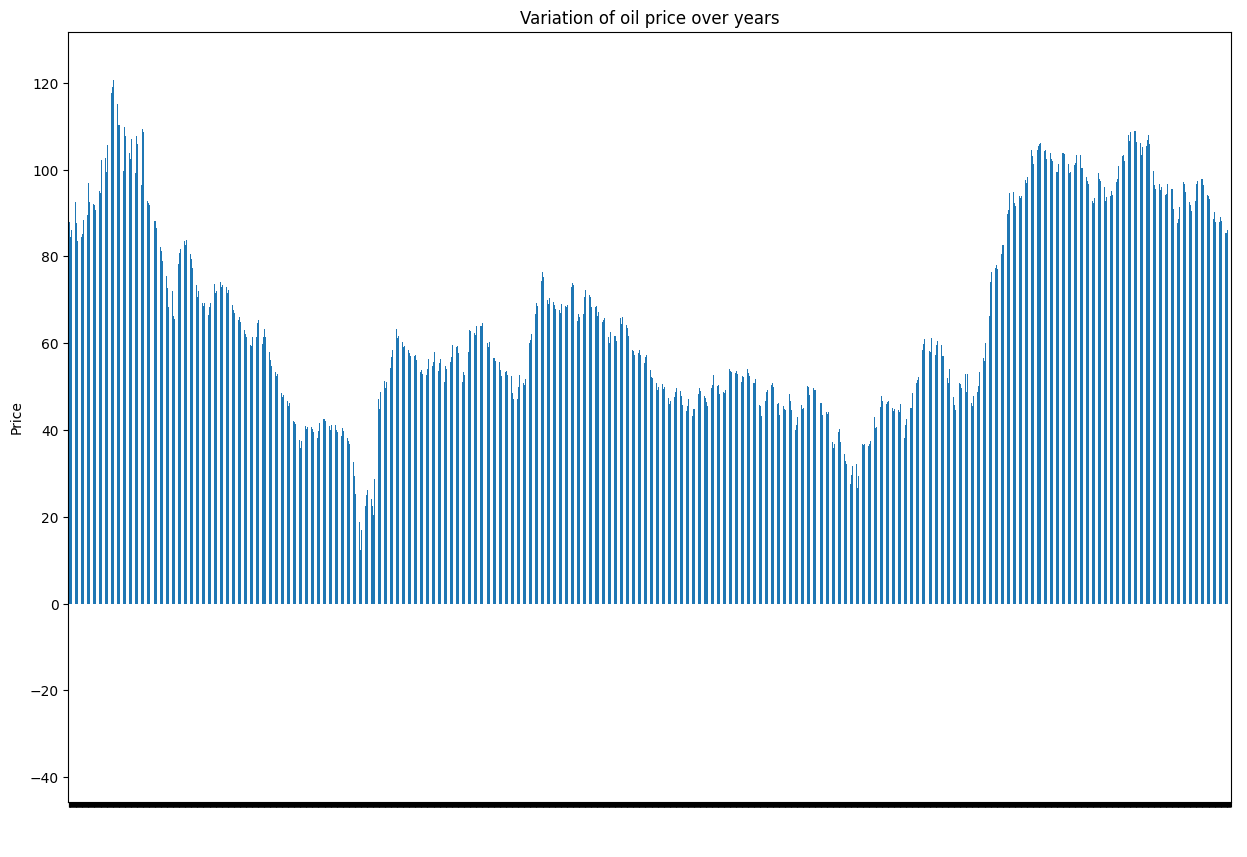

In [8]:
plt.figure(figsize=(15,10))
df['Close/Last'].plot(kind='bar')
plt.title('Variation of oil price over years')
plt.ylabel('Price')
plt.xticks(color = 'w',rotation=90)

In [9]:
df_copy = df.copy()
df_copy

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63
...,...,...,...,...,...,...
2542,11/06/2012,88.71,270163.0,85.67,89.22,85.42
2543,11/05/2012,85.65,185846.0,84.65,85.90,84.34
2544,11/02/2012,84.86,273619.0,86.91,87.24,84.66
2545,11/01/2012,87.09,185097.0,86.10,87.42,85.92


In [ ]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy['year']=df_copy['Date'].dt.year
df_copy['year']

Text(0, 0.5, 'Oil Price Trend')

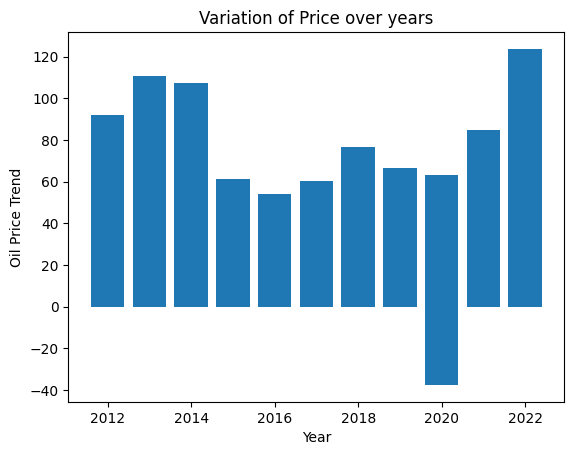

In [11]:
x=df_copy['year']
y=df_copy['Close/Last']
plt.bar(x,y)
plt.title('Variation of Price over years')
plt.xlabel('Year')
plt.ylabel('Oil Price Trend')

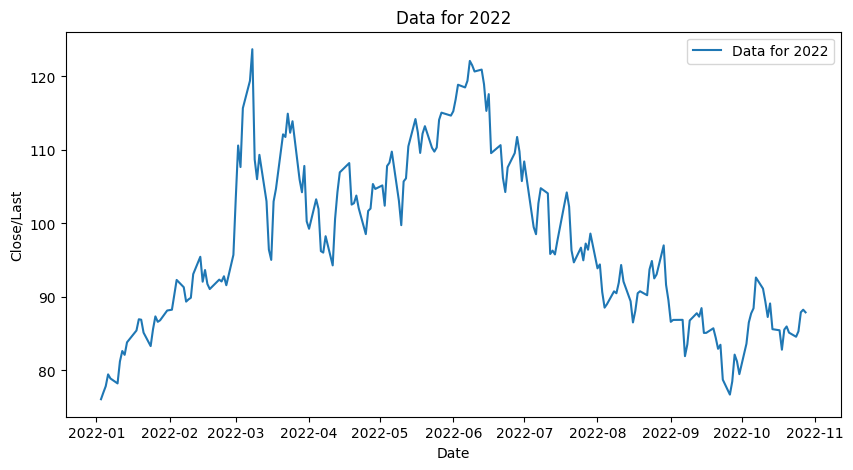

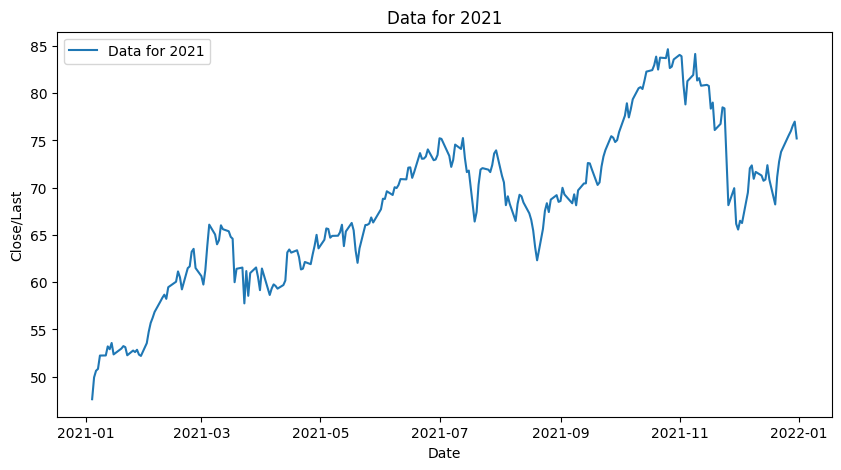

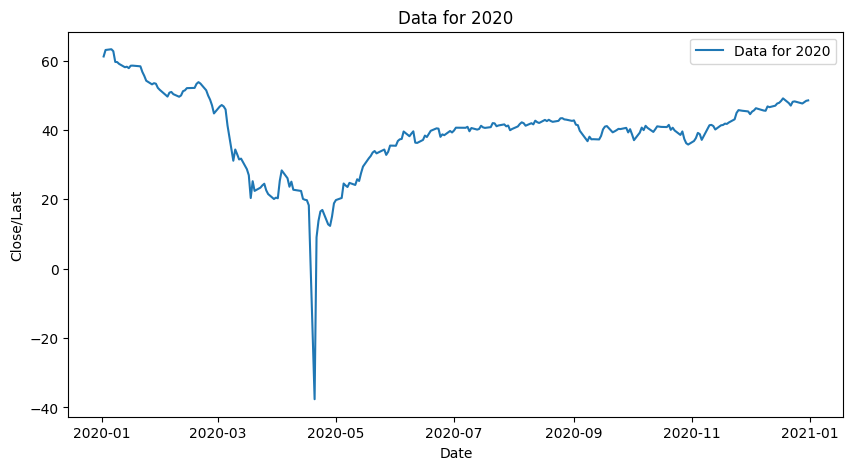

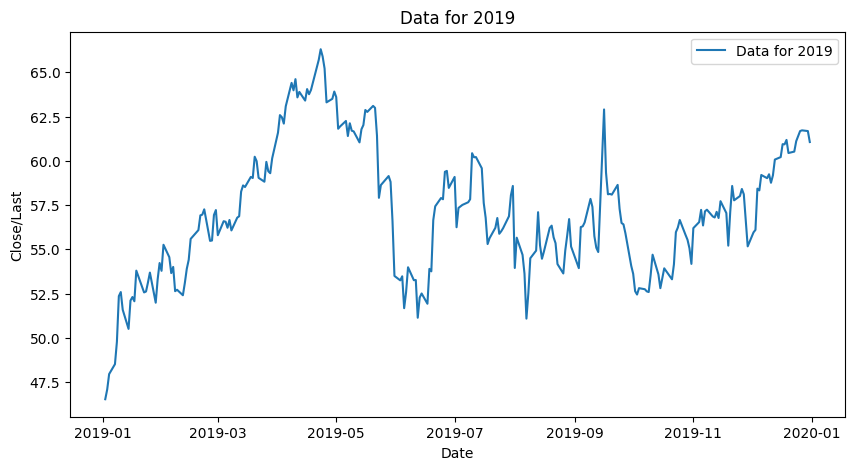

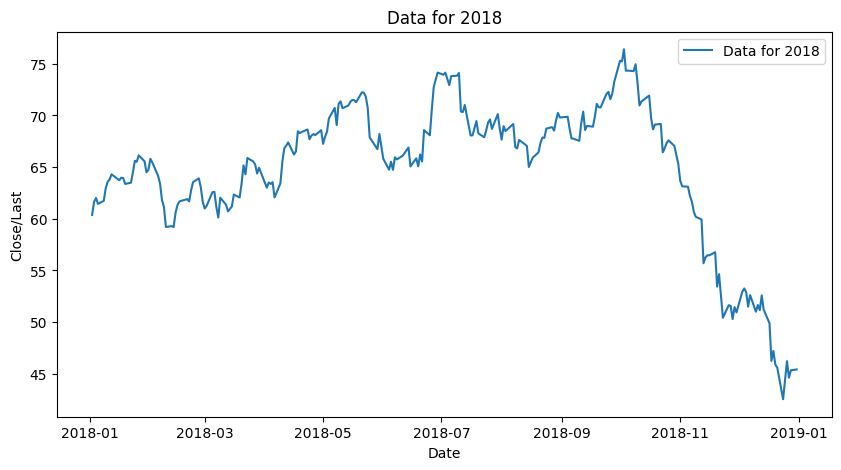

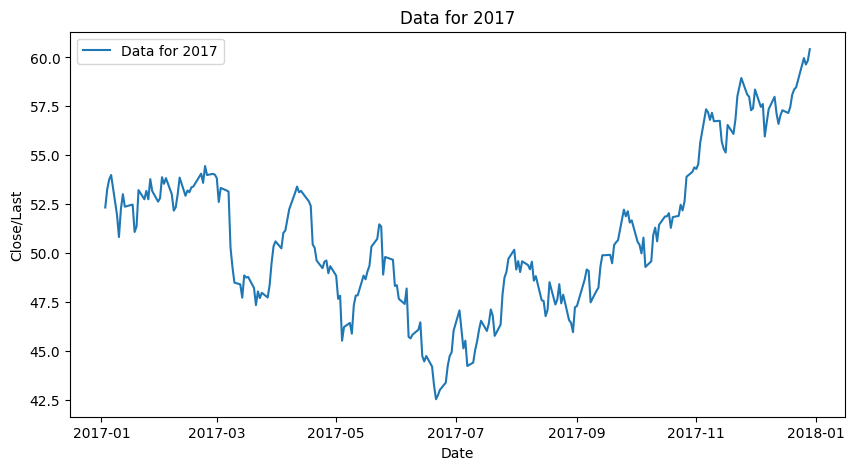

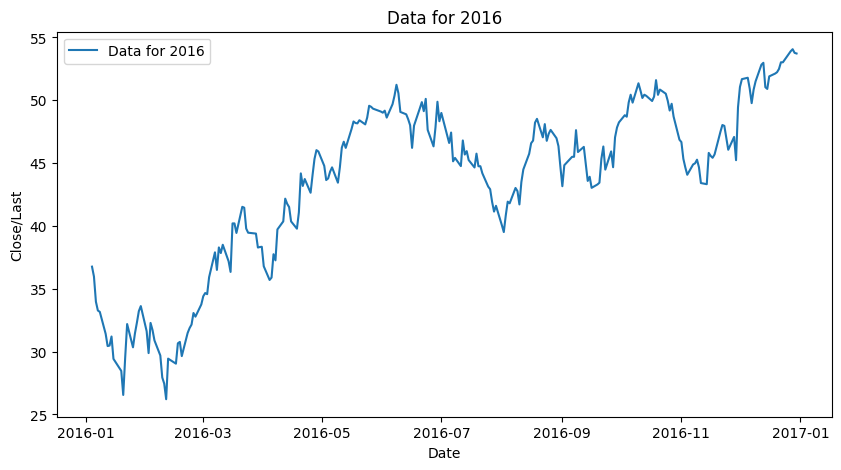

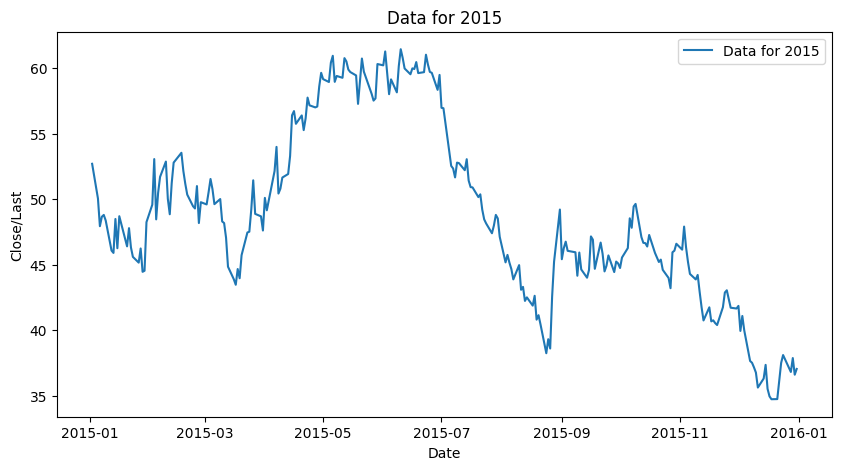

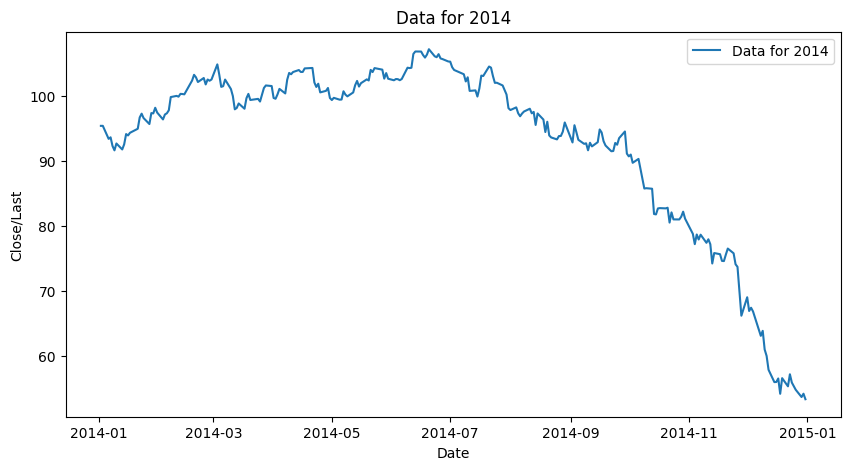

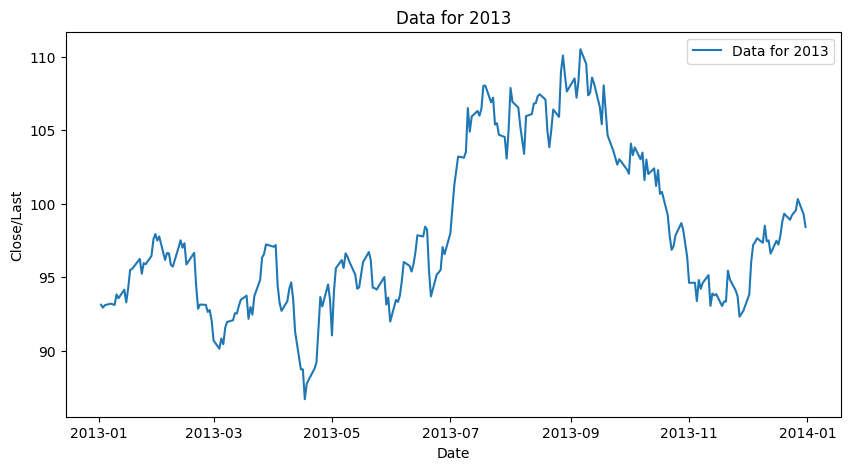

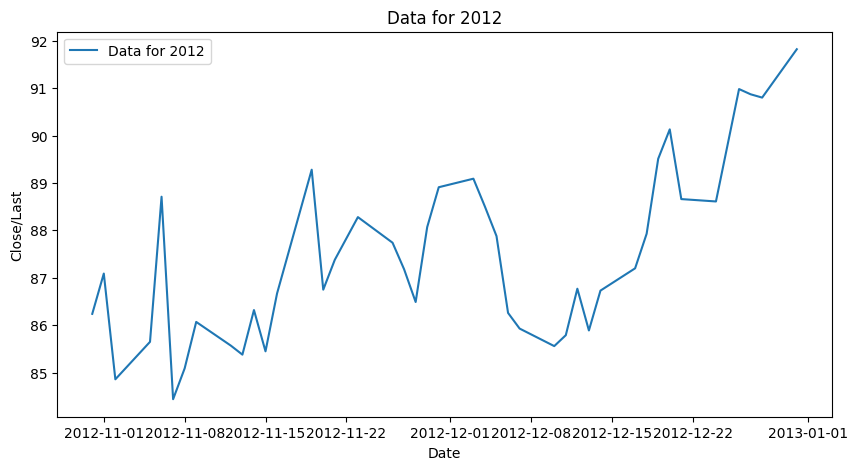

In [12]:
# Ensuring the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Settting 'Date' as the index
df.set_index('Date', inplace=True)

# Extracting unique years from the datetime index
unique_years = df.index.year.unique()

# Creating a line plot for each year
for year in unique_years:
    year_data = df[df.index.year == year]  # Filtering data for the current year

    # Creating a line plot for the current year's data
    plt.figure(figsize=(10, 5))
    plt.plot(year_data.index, year_data['Close/Last'], label=f'Data for {year}')
    plt.xlabel('Date')
    plt.ylabel('Close/Last')
    plt.title(f'Data for {year}')
    plt.legend()
    plt.show()


<Axes: xlabel='year', ylabel='Close/Last'>

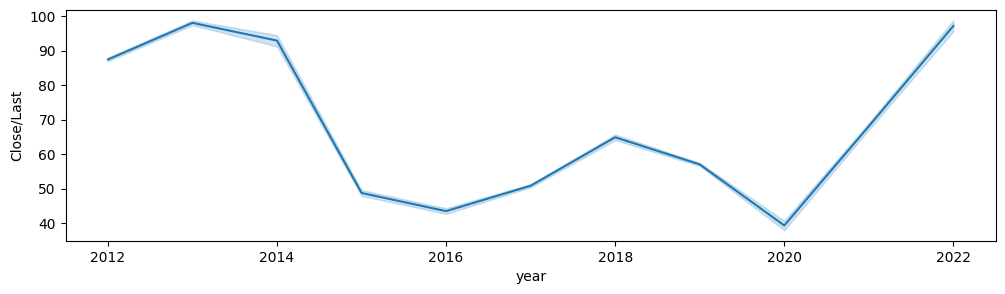

In [ ]:
# Lineplot
import seaborn as sns
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Close/Last",data=df_copy)

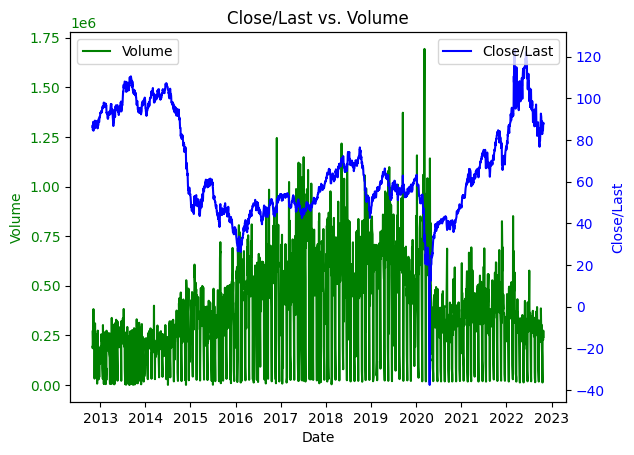

In [15]:
# Plotting Colse/Last vs. Volume plot

fig, ax1 = plt.subplots()

ax1.plot(df['Volume'], color='g', label='Volume')
ax1.set_ylabel('Volume', color='g')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.plot(df['Close/Last'], color='b', label='Close/Last')
ax2.set_ylabel('Close/Last', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Close/Last vs. Volume')
plt.show()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

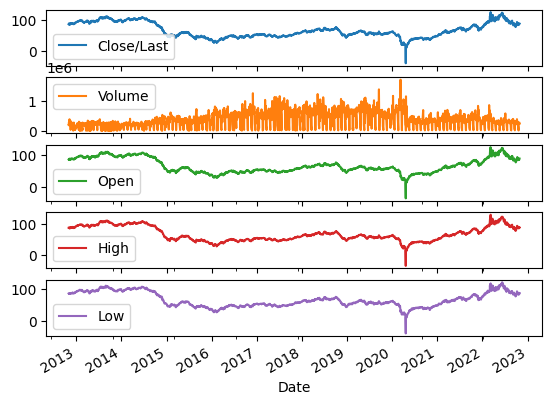

In [ ]:
df.plot(subplots=True)

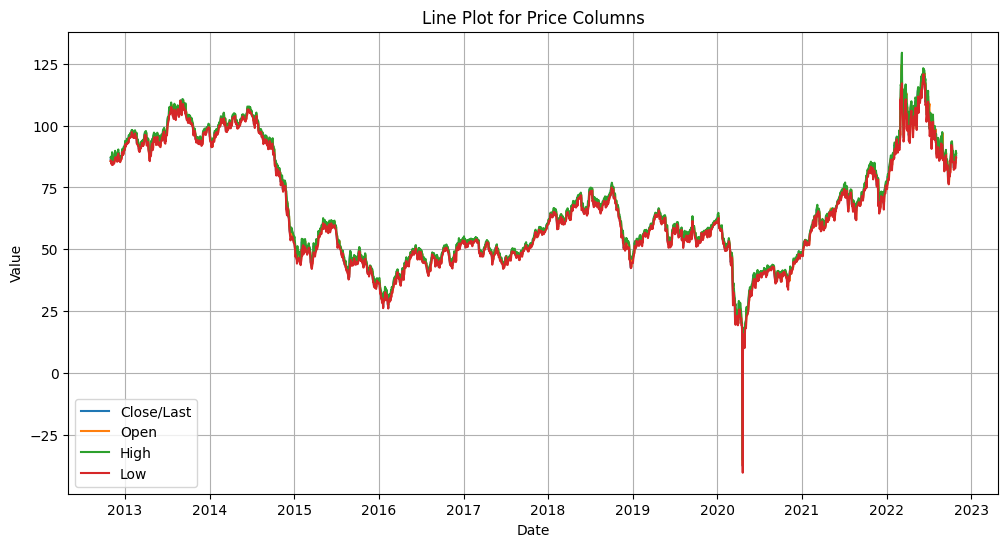

In [ ]:
columns_to_plot = ['Close/Last', 'Open', 'High', 'Low']

# Plotting all columns on the same graph
plt.figure(figsize=(12, 6))

for column in columns_to_plot:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Plot for Price Columns')
plt.legend()
plt.grid(True)

plt.show()

- Seasonality: Represents the repeating patterns or cycles in the data (e.g., daily, weekly, yearly patterns).
- Trend: Represents the long-term direction or trend in the data.
- Original Data: Represents the complete time series, including both trend and seasonality.
- Residuals: Represents the unexplained variation or random noise in the data after removing the trend and seasonality.


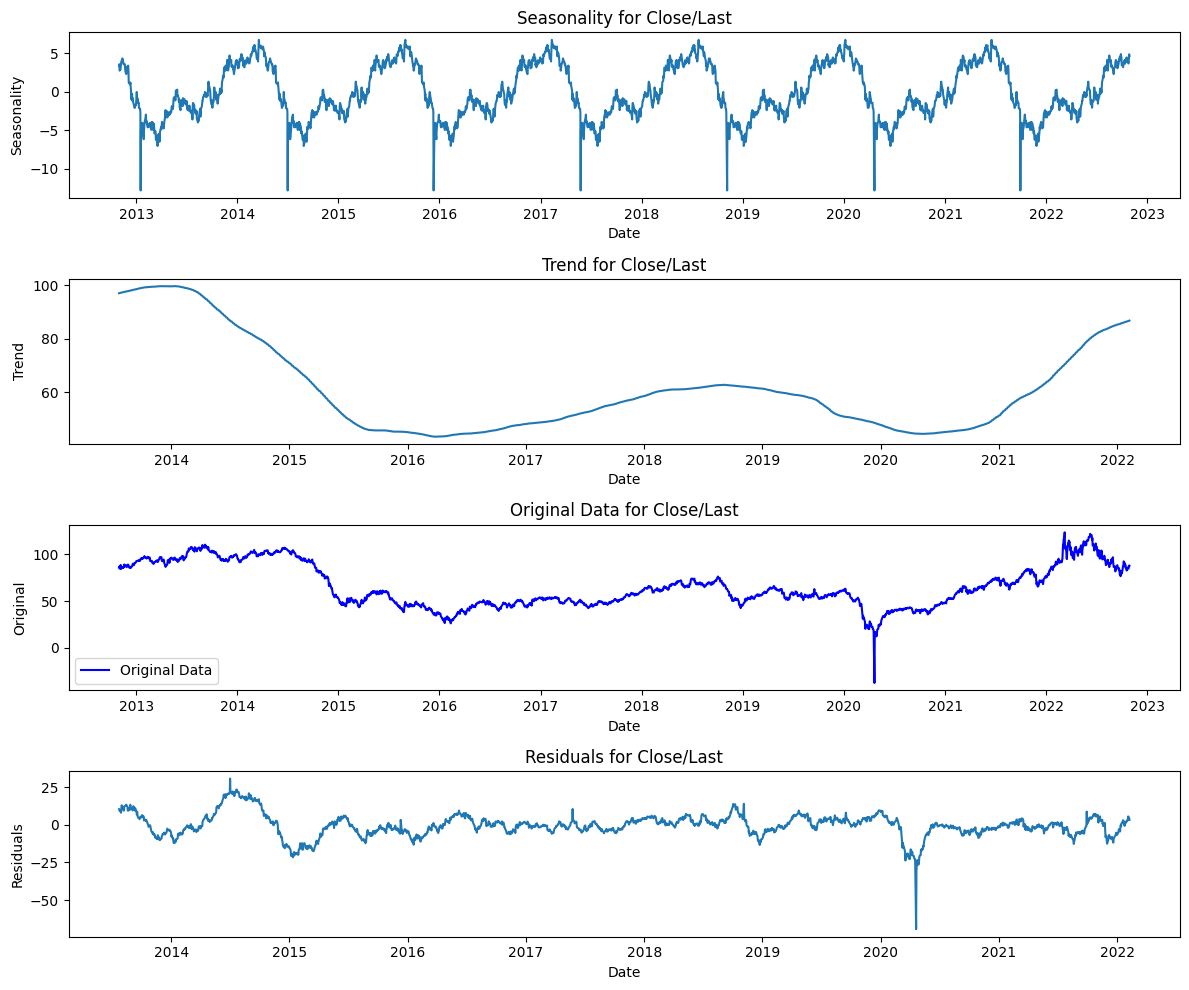

In [13]:
# Performing Seasonality, Trend, Original and Residual Plots on Daily basis

from statsmodels.tsa.seasonal import seasonal_decompose
# Performing seasonal decomposition
result = seasonal_decompose(df['Close/Last'], model='additive', period=365)

# Plot the components: seasonality, trend, and original data
plt.figure(figsize=(12, 10))

# Seasonality plot
plt.subplot(411)
plt.plot(result.seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.title('Seasonality for Close/Last')

# Trend plot
plt.subplot(412)
plt.plot(result.trend)
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend for Close/Last')

# Original data plot
plt.subplot(413)
plt.plot(df.index, df['Close/Last'], label='Original Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Original')
plt.title('Original Data for Close/Last')
plt.legend()

# Residuals plot
plt.subplot(414)
plt.plot(result.resid)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals for Close/Last')

plt.tight_layout()
plt.show()

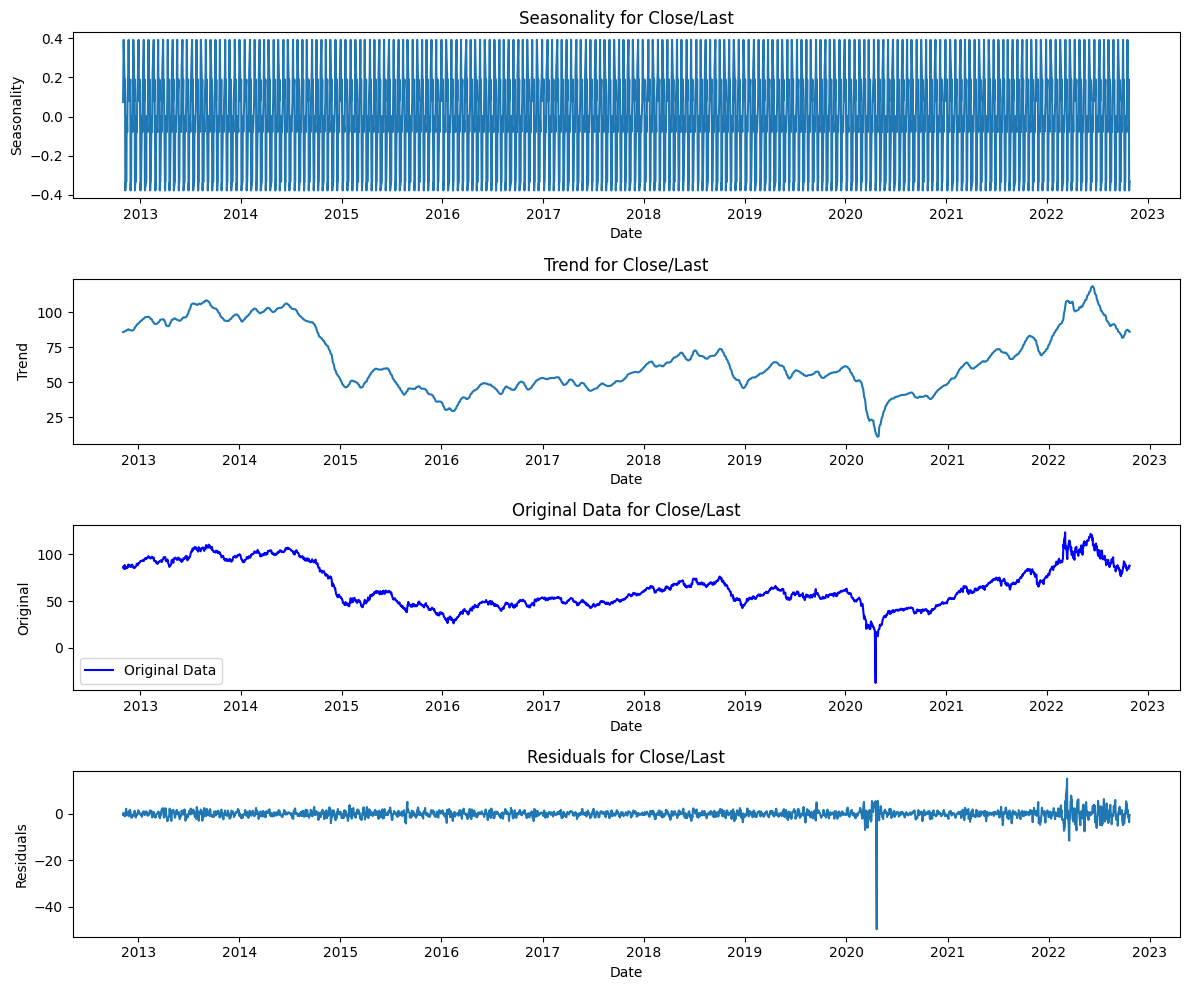

In [14]:
# Performing Seasonality, Trend, Original and Residual Plots on Monthyly basis

from statsmodels.tsa.seasonal import seasonal_decompose
# Performing seasonal decomposition
result = seasonal_decompose(df['Close/Last'], model='additive', period=12)

# Plot the components: seasonality, trend, and original data
plt.figure(figsize=(12, 10))

# Seasonality plot
plt.subplot(411)
plt.plot(result.seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.title('Seasonality for Close/Last')

# Trend plot
plt.subplot(412)
plt.plot(result.trend)
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend for Close/Last')

# Original data plot
plt.subplot(413)
plt.plot(df.index, df['Close/Last'], label='Original Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Original')
plt.title('Original Data for Close/Last')
plt.legend()

# Residuals plot
plt.subplot(414)
plt.plot(result.resid)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals for Close/Last')

plt.tight_layout()
plt.show()

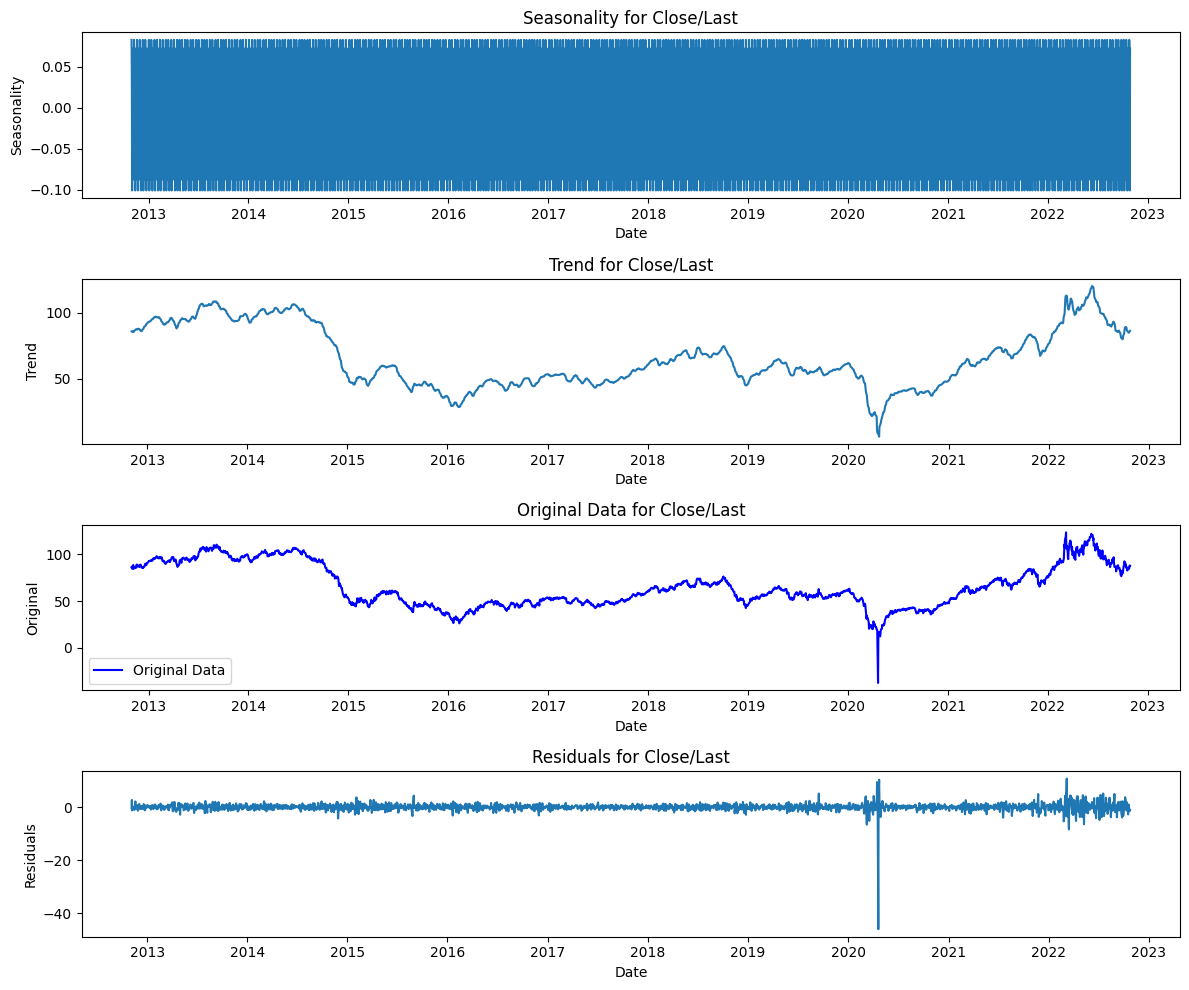

In [15]:
# Performing Seasonality, Trend, Original and Residual Plots on Daily basis

from statsmodels.tsa.seasonal import seasonal_decompose
# Performing seasonal decomposition
result = seasonal_decompose(df['Close/Last'], model='additive', period=7)

# Plot the components: seasonality, trend, and original data
plt.figure(figsize=(12, 10))

# Seasonality plot
plt.subplot(411)
plt.plot(result.seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.title('Seasonality for Close/Last')

# Trend plot
plt.subplot(412)
plt.plot(result.trend)
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend for Close/Last')

# Original data plot
plt.subplot(413)
plt.plot(df.index, df['Close/Last'], label='Original Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Original')
plt.title('Original Data for Close/Last')
plt.legend()

# Residuals plot
plt.subplot(414)
plt.plot(result.resid)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals for Close/Last')

plt.tight_layout()
plt.show()

- Here we can see that there is pattern occuring in Residual plot, that's why we can say that our data is not stationary, so we have to perform higher order differencing to achieve stationarity.

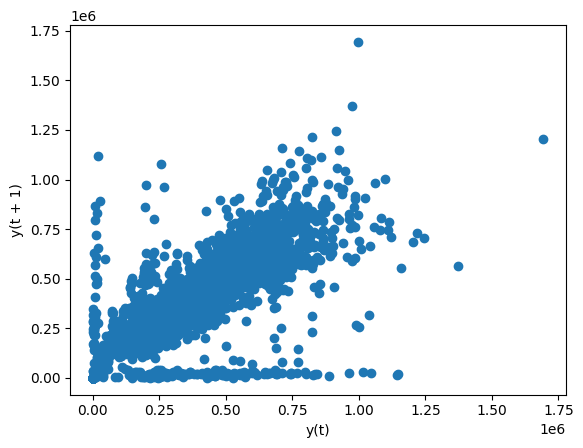

In [19]:
# Lag plot
# creating a scatter plot
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(df)
pyplot.show()

<Figure size 4000x1000 with 0 Axes>

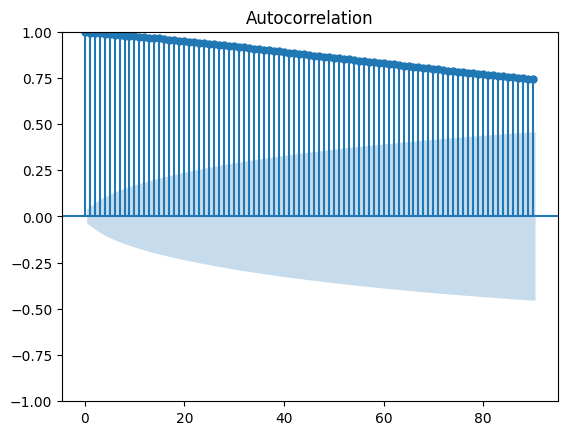

In [20]:
# Autocorrelation plot
from matplotlib import pyplot
pyplot.figure(figsize = (40,10))

series = pd.read_csv('Crude oil.csv', header=0, index_col=0,parse_dates=True)

ts = series['Close/Last']

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts,lags=90)
pyplot.show()

- The above data come from an underlying autoregressive model with strong positive autocorrelation.
- The plot starts with a high autocorrelation at lag 1 that slowly declines.
  It continues decreasing until it becomes near to 0.70.
  The decreasing autocorrelation is generally linear with little noise.
  Such a pattern is the autocorrelation plot signature of "strong autocorrelation",
  which in turn provides high predictability if modeled properly.

In [16]:
# Checking for stationarity using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close/Last'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# A stationary time series is one whose statistical properties, such as mean and variance, do not change over time.
# Here, We can see that the p-value is greater than 0.05, so the data is not stationary.

ADF Statistic: -1.6298905623870465
p-value: 0.46754799781602907
Critical Values: {'1%': -3.432954851668868, '5%': -2.862690812247962, '10%': -2.5673826214832887}


In [17]:
# Performing differencing
# Differencing is a common technique used in time series analysis to transform a non-stationary time series into a stationary one.

if result[1] > 0.05:
    df['OilPriceDiff_1'] = df['Close/Last'] - df['Close/Last'].shift(1)
    df['OilPriceDiff_1'].dropna(inplace=True)
else:
    df['OilPriceDiff_1'] = df['Close/Last']

In [23]:
df

,Close/Last,Volume,Open,High,Low,OilPriceDiff_1
Date,,,,,,
2022-10-28,87.90,241417.0,88.67,88.76,87.08,NaN
2022-10-27,88.26,273717.0,88.26,89.79,87.33,0.36
2022-10-26,87.91,271474.0,85.07,88.41,84.14,-0.35
2022-10-25,85.32,226337.0,84.88,86.03,83.06,-2.59
2022-10-24,84.58,238458.0,85.24,85.92,82.63,-0.74
...,...,...,...,...,...,...
2012-11-06,88.71,270163.0,85.67,89.22,85.42,4.27
2012-11-05,85.65,185846.0,84.65,85.90,84.34,-3.06
2012-11-02,84.86,273619.0,86.91,87.24,84.66,-0.79


- Here we are going to performe second order differencing to remove any trends or seasonality that were not fully eliminated by first-order differencing.
- Also to remove patterns from the residual plot which might cause insufficiency in achieving stationarity.

In [18]:
# Performing second-order differencing on the first differences
df['OilPriceDiff_2'] = df['Close/Last'].diff().diff()
df.dropna(subset=['OilPriceDiff_2'], inplace=True)
df['OilPriceDiff_2']

Date
2022-10-26   -0.71
2022-10-25   -2.24
2022-10-24    1.85
2022-10-21    1.30
2022-10-20    0.28
              ... 
2012-11-06    4.92
2012-11-05   -7.33
2012-11-02    2.27
2012-11-01    3.02
2012-10-31   -3.08
Name: OilPriceDiff_2, Length: 2515, dtype: float64

In [19]:
df

,Close/Last,Volume,Open,High,Low,OilPriceDiff_1,OilPriceDiff_2
Date,,,,,,,
2022-10-26,87.91,271474.0,85.07,88.41,84.14,-0.35,-0.71
2022-10-25,85.32,226337.0,84.88,86.03,83.06,-2.59,-2.24
2022-10-24,84.58,238458.0,85.24,85.92,82.63,-0.74,1.85
2022-10-21,85.14,259938.0,85.07,85.90,83.15,0.56,1.30
2022-10-20,85.98,12307.0,85.94,88.17,85.22,0.84,0.28
...,...,...,...,...,...,...,...
2012-11-06,88.71,270163.0,85.67,89.22,85.42,4.27,4.92
2012-11-05,85.65,185846.0,84.65,85.90,84.34,-3.06,-7.33
2012-11-02,84.86,273619.0,86.91,87.24,84.66,-0.79,2.27


In [20]:
missing_values = df['OilPriceDiff_2'].isnull().sum()
print(f"Number of missing values in 'OilPriceDiff_2': {missing_values}")

Number of missing values in 'OilPriceDiff_2': 0


In [21]:
# Again checking for stationarity using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result_1 = adfuller(df['OilPriceDiff_2'])
print("ADF Statistic:", result_1[0])
print("p-value:", result_1[1])
print("Critical Values:", result_1[4])

ADF Statistic: -16.865585448662475
p-value: 1.091127801469649e-29
Critical Values: {'1%': -3.4329821119179256, '5%': -2.862702850392563, '10%': -2.5673890307492004}


In [22]:
# Performing third-order differencing on the first differences
df['OilPriceDiff_3'] = df['Close/Last'].diff().diff().diff()
df.dropna(subset=['OilPriceDiff_3'], inplace=True)
df['OilPriceDiff_3']

Date
2022-10-21    -0.55
2022-10-20    -1.02
2022-10-19    -1.55
2022-10-18    -1.03
2022-10-17     7.67
              ...  
2012-11-06     4.59
2012-11-05   -12.25
2012-11-02     9.60
2012-11-01     0.75
2012-10-31    -6.10
Name: OilPriceDiff_3, Length: 2512, dtype: float64

In [23]:
df

,Close/Last,Volume,Open,High,Low,OilPriceDiff_1,OilPriceDiff_2,OilPriceDiff_3
Date,,,,,,,,
2022-10-21,85.14,259938.0,85.07,85.90,83.15,0.56,1.30,-0.55
2022-10-20,85.98,12307.0,85.94,88.17,85.22,0.84,0.28,-1.02
2022-10-19,85.55,38236.0,83.69,86.20,82.59,-0.43,-1.27,-1.55
2022-10-18,82.82,83685.0,85.70,86.51,82.09,-2.73,-2.30,-1.03
2022-10-17,85.46,143488.0,85.59,87.12,84.61,2.64,5.37,7.67
...,...,...,...,...,...,...,...,...
2012-11-06,88.71,270163.0,85.67,89.22,85.42,4.27,4.92,4.59
2012-11-05,85.65,185846.0,84.65,85.90,84.34,-3.06,-7.33,-12.25
2012-11-02,84.86,273619.0,86.91,87.24,84.66,-0.79,2.27,9.60


In [24]:
# Again checking for stationarity using Augmented Dickey-Fuller test
result_2 = adfuller(df['OilPriceDiff_3'])
print("ADF Statistic:", result_2[0])
print("p-value:", result_2[1])
print("Critical Values:", result_2[4])

ADF Statistic: -20.299038718171325
p-value: 0.0
Critical Values: {'1%': -3.432985294091178, '5%': -2.862704255635287, '10%': -2.567389778920032}


- Now, after performing all the third order differencing, we can say that our whole data is stationary by observing the p-value which is less than 0.05.

# 3. Forecasting the Models

(1) LSTM Model

In [37]:
# Extracting the selected column as a pandas Series
series = df["Close/Last"].values.reshape(-1, 1)
series

array([[85.14],
       [85.98],
       [85.55],
       ...,
       [84.86],
       [87.09],
       [86.24]])

In [38]:
# Normalizing the data into (-1 to 1) using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
series = scaler.fit_transform(series)
series

array([[0.7609868 ],
       [0.76619352],
       [0.76352817],
       ...,
       [0.75925122],
       [0.77307382],
       [0.76780512]])

In [39]:
# Defining a function to prepare the data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [40]:
# Defining the number of time steps and split the data into training and testing sets
time_steps = 10
X, y = prepare_data(series, time_steps)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [41]:
pip install tensorflow

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
# Building an LSTM model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
32/32 [==============================] - 5s 22ms/step - loss: 0.1085
Epoch 2/50
32/32 [==============================] - 1s 16ms/step - loss: 0.0034
Epoch 3/50
32/32 [==============================] - 0s 16ms/step - loss: 0.0016
Epoch 4/50
32/32 [==============================] - 0s 14ms/step - loss: 9.8141e-04
Epoch 5/50
32/32 [==============================] - 0s 15ms/step - loss: 5.6493e-04
Epoch 6/50
32/32 [==============================] - 0s 12ms/step - loss: 5.4741e-04
Epoch 7/50
32/32 [==============================] - 0s 14ms/step - loss: 5.4155e-04
Epoch 8/50
32/32 [==============================] - 0s 13ms/step - loss: 5.1308e-04
Epoch 9/50
32/32 [==============================] - 0s 16ms/step - loss: 4.9974e-04
Epoch 10/50
32/32 [==============================] - 0s 14ms/step - loss: 5.0333e-04
Epoch 11/50
32/32 [==============================] - 0s 13ms/step - loss: 5.0701e-04
Epoch 12/50
32/32 [==============================] - 0s 14ms/step - loss: 4.9787e-04
E

In [45]:
# Making predictions on the test data
y_pred = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


In [46]:
# Inversing to transform the predictions and actual values to their original scale
y_pred = scaler.inverse_transform(y_pred)
y_pred
y_test = scaler.inverse_transform(y_test)
y_test

array([[ 81.42],
       [ 81.  ],
       [ 81.01],
       [ 82.09],
       [ 80.52],
       [ 82.81],
       [ 82.71],
       [ 82.75],
       [ 82.7 ],
       [ 81.78],
       [ 81.84],
       [ 85.74],
       [ 85.82],
       [ 85.77],
       [ 87.31],
       [ 88.85],
       [ 90.34],
       [ 89.74],
       [ 91.01],
       [ 90.73],
       [ 91.16],
       [ 94.57],
       [ 93.54],
       [ 92.53],
       [ 92.8 ],
       [ 91.56],
       [ 91.52],
       [ 92.41],
       [ 93.07],
       [ 94.42],
       [ 94.88],
       [ 92.92],
       [ 92.27],
       [ 92.83],
       [ 91.67],
       [ 92.75],
       [ 92.66],
       [ 93.29],
       [ 94.45],
       [ 95.54],
       [ 92.88],
       [ 95.96],
       [ 94.55],
       [ 93.88],
       [ 93.86],
       [ 93.35],
       [ 93.65],
       [ 93.96],
       [ 96.07],
       [ 94.48],
       [ 96.41],
       [ 97.35],
       [ 95.58],
       [ 97.59],
       [ 97.37],
       [ 98.08],
       [ 97.65],
       [ 97.34],
       [ 96.92

In [47]:
# Calculating the root mean squared error (RMSE) as an evaluation metric
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 2.5898996478423832


In [49]:
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
MAPE(y_pred,y_test)

1.4198576594863297

In [1]:
# Plotting the actual vs. predicted oil prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.legend()
plt.title('Actual vs. Predicted Oil Prices')
plt.show()

NameError: ignored

(2) Linear Regression

In [51]:
x=df_copy['year'].values.reshape(-1,1)
y=df_copy['Close/Last'].values.reshape(-1,1)

In [52]:
df_copy

,Date,Close/Last,Volume,Open,High,Low,year
0,2022-10-28,87.90,241417.0,88.67,88.76,87.08,2022
1,2022-10-27,88.26,273717.0,88.26,89.79,87.33,2022
2,2022-10-26,87.91,271474.0,85.07,88.41,84.14,2022
3,2022-10-25,85.32,226337.0,84.88,86.03,83.06,2022
4,2022-10-24,84.58,238458.0,85.24,85.92,82.63,2022
...,...,...,...,...,...,...,...
2542,2012-11-06,88.71,270163.0,85.67,89.22,85.42,2012
2543,2012-11-05,85.65,185846.0,84.65,85.90,84.34,2012
2544,2012-11-02,84.86,273619.0,86.91,87.24,84.66,2012
2545,2012-11-01,87.09,185097.0,86.10,87.42,85.92,2012


In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [55]:
score=reg.score(xtest,ytest)
print(score)

0.020734267773038217


In [56]:
y_pred = model.predict(xtest)

16/16 [==============================] - 0s 2ms/step


In [57]:
from sklearn.metrics import accuracy_score     #Oil price in 2024
ypredict=reg.predict([[2024]])
print(ypredict)

[[54.65766513]]


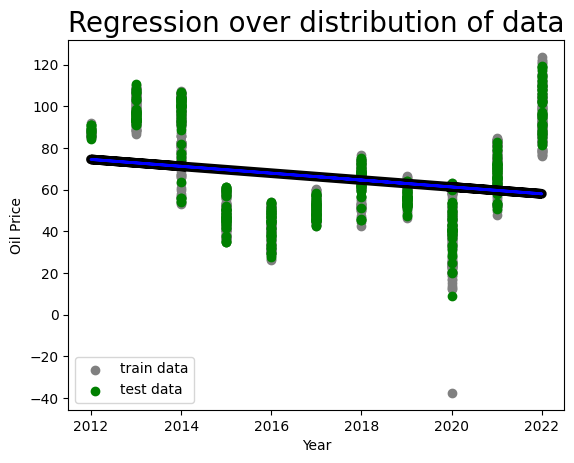

In [58]:
plt_train=plt.scatter(xtrain,ytrain,color='grey')
plt_test=plt.scatter(xtest,ytest,color='green')
plt.plot(xtrain, reg.predict(xtrain), color='black', linewidth=7)
plt.plot(xtest,reg.predict(xtest),  color='blue', linewidth=2)
plt.title('Regression over distribution of data',fontsize=20)
plt.xlabel("Year")
plt.ylabel("Oil Price")
plt.legend((plt_train, plt_test),("train data", "test data"))
plt.show()

(3) ARIMA Model

In [ ]:
# Again checking for stationarity using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result_2 = adfuller(df['OilPriceDiff_3'])
print("ADF Statistic:", result_2[0])
print("p-value:", result_2[1])
print("Critical Values:", result_2[4])

ADF Statistic: -20.299038718171325
p-value: 0.0
Critical Values: {'1%': -3.432985294091178, '5%': -2.862704255635287, '10%': -2.567389778920032}


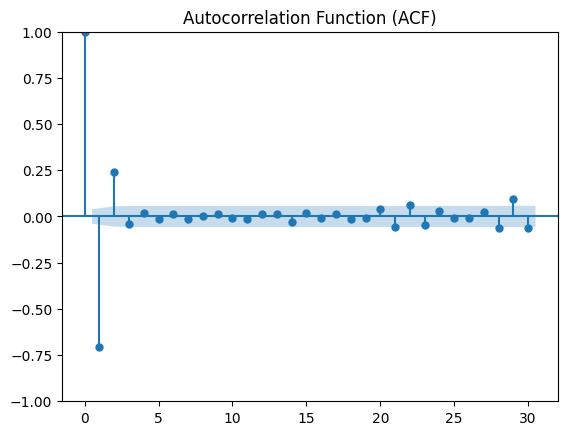

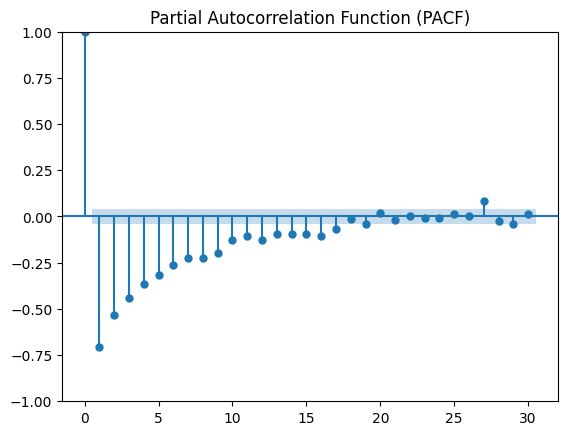

In [ ]:
# Plotting ACF and PACF to determine AR and MA orders
plot_acf(df['OilPriceDiff_3'], lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df['OilPriceDiff_3'], lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(df['Close/Last'],
                      start_p=1,
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

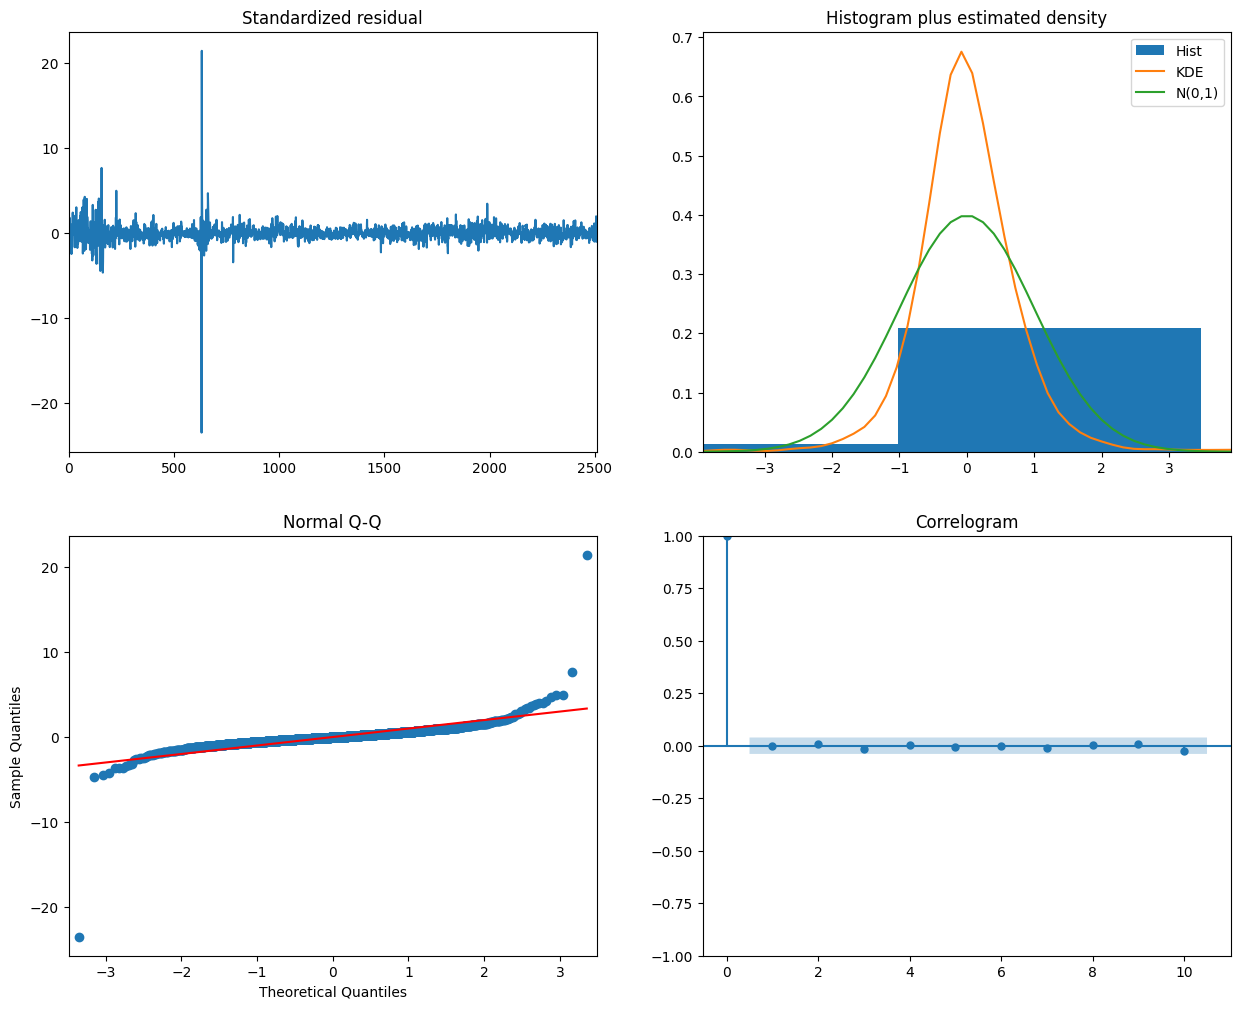

In [ ]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


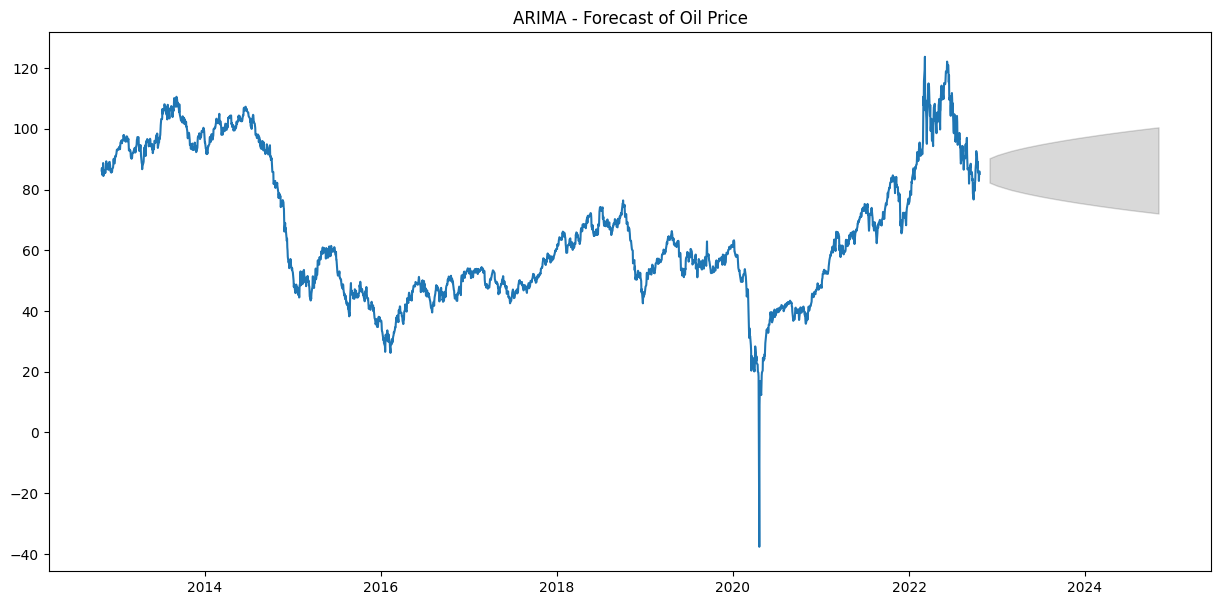

In [27]:
def forecast(ARIMA_model, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df.index[0] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    #plt.plot(train, label='training')
    #plt.plot(test, label='actual')
    plt.plot(df["Close/Last"], color='#1f76b4', label='forecast')
    #plt.plot(fitted_series, color='darkgreen', label='forecast')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='k', alpha=.15)

    plt.title("ARIMA - Forecast of Oil Price")
    plt.show()

forecast(ARIMA_model)

In [ ]:
import pmdarima as pm

In [29]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Close/Last'],order=(1,0,2))
results_ARIMA=model.fit()

results_ARIMA.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close/Last   No. Observations:                 2512
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -5363.088
Date:                Sat, 14 Oct 2023   AIC                          10736.175
Time:                        12:15:51   BIC                          10765.319
Sample:                             0   HQIC                         10746.753
                               - 2512                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.8174     14.485      4.544      0.000      37.427      94.207
ar.L1          0.9979      0.001    843.873      0.000       0.996       1.000
ma.L1         -0.2457      0.004    -55.025      0.000      -0.254      -0.237
ma.L2         -0.0373      0.008     -4.846      0.000      -0.052      -0.022
sigma2         4.1794      0.018    237.852      0.000       4.145       4.214
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           4512762.76
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                       210.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
predictions=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions.head())

Date
2022-10-21    65.817354
2022-10-20    85.054952
2022-10-19    85.724717
2022-10-18    85.517765
2022-10-17    83.451902
dtype: float64


In [31]:
forecast=results_ARIMA.forecast(steps=10)
forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2512    86.216102
2513    86.186404
2514    86.142897
2515    86.099483
2516    86.056162
2517    86.012933
2518    85.969796
2519    85.926752
2520    85.883800
2521    85.840939
Name: predicted_mean, dtype: float64

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(df['Close/Last'], predictions))
print("RMSE: ",arma_rmse)

RMSE:  2.0800954206488527


In [35]:
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [36]:
MAPE(predictions,df['Close/Last'])

2.1450266196046193

In [64]:
# Splitting the data into training and testing sets
train_size = int(len(df) * 0.8)  # Adjust the split ratio as needed
train, test = df['OilPriceDiff_3'][:train_size], df['OilPriceDiff_3'][train_size:]

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y = train

In [66]:
ARMAmodel = SARIMAX(y, order = (2, 0, 2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
ARMAmodel = ARMAmodel.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [68]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


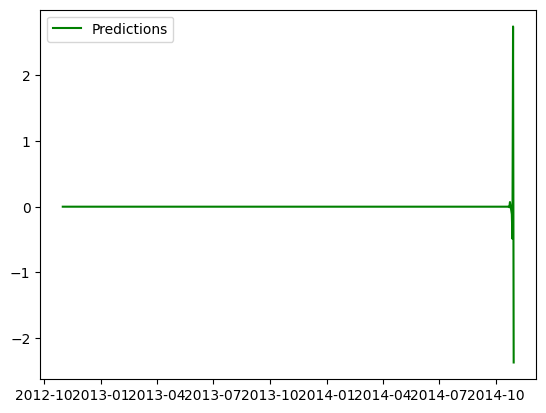

In [69]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [70]:
arma_rmse = np.sqrt(mean_squared_error(test, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  2.8410695980195877


In [71]:
ARMAmodel.forecast(10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2009   -2.371819
2010    2.743737
2011   -0.488837
2012   -0.112588
2013    0.070485
2014   -0.008114
2015   -0.004015
2016    0.001712
2017   -0.000087
2018   -0.000125
Name: predicted_mean, dtype: float64

In [46]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

RMSE:  2.8395057548418956


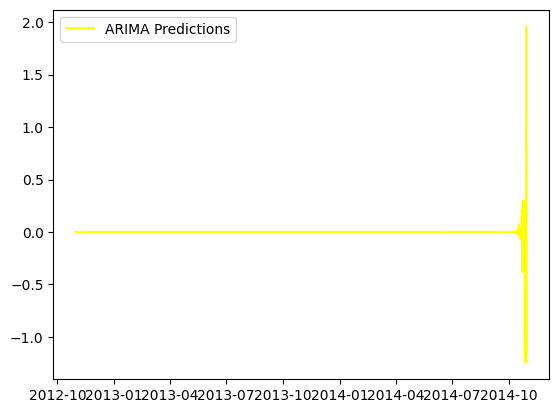

In [47]:
ARIMAmodel = ARIMA(y, order = (2, 0, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [73]:
#from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from sklearn.metrics import mean_squared_error

In [74]:
data = pd.read_csv("Crude oil.csv")
data.dropna(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [75]:
# Splitting the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [76]:
# Build and train the Exponential Smoothing model
model = ExponentialSmoothing(train_data['Close/Last'], trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [77]:
# Calculate Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(test_data['Close/Last'], predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Squared Error (MSE): 438.10
Root Mean Squared Error (RMSE): 20.93


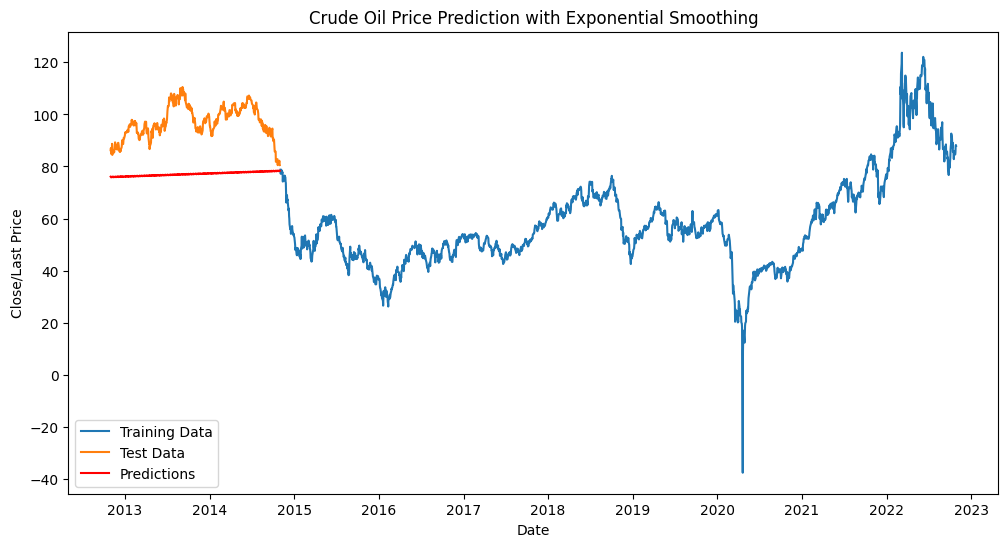

In [78]:
# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close/Last'], label='Training Data')
plt.plot(test_data.index, test_data['Close/Last'], label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions', color='red')
plt.title('Crude Oil Price Prediction with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.legend()
plt.show()

Simple Exponential Smoothing

In [79]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
alpha = 0.15

model_ses12=SimpleExpSmoothing(data['Close/Last'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
fitted_model.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Date
2022-10-28    87.900000
2022-10-27    87.900000
2022-10-26    87.954000
2022-10-25    87.947400
2022-10-24    87.553290
                ...    
2012-11-06    86.089748
2012-11-05    86.482786
2012-11-02    86.357868
2012-11-01    86.133188
2012-10-31    86.276710
Length: 2517, dtype: float64

In [80]:
data['SES12'] = fitted_model.fittedvalues.shift(-1)
data.head()

,Close/Last,Volume,Open,High,Low,SES12
Date,,,,,,
2022-10-28,87.90,241417.0,88.67,88.76,87.08,87.900000
2022-10-27,88.26,273717.0,88.26,89.79,87.33,87.954000
2022-10-26,87.91,271474.0,85.07,88.41,84.14,87.947400
2022-10-25,85.32,226337.0,84.88,86.03,83.06,87.553290
2022-10-24,84.58,238458.0,85.24,85.92,82.63,87.107297


Double Exponential Smoothing

In [81]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12 = ExponentialSmoothing(data['Close/Last'], trend='add')
fitted_model= mod_add12.fit()
data['DESadd12'] = fitted_model.fittedvalues.shift(-1)
data.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Close/Last,Volume,Open,High,Low,SES12,DESadd12
Date,,,,,,,
2022-10-28,87.90,241417.0,88.67,88.76,87.08,87.900000,87.905554
2022-10-27,88.26,273717.0,88.26,89.79,87.33,87.954000,88.169136
2022-10-26,87.91,271474.0,85.07,88.41,84.14,87.947400,87.975366
2022-10-25,85.32,226337.0,84.88,86.03,83.06,87.553290,85.995495
2022-10-24,84.58,238458.0,85.24,85.92,82.63,87.107297,84.939799


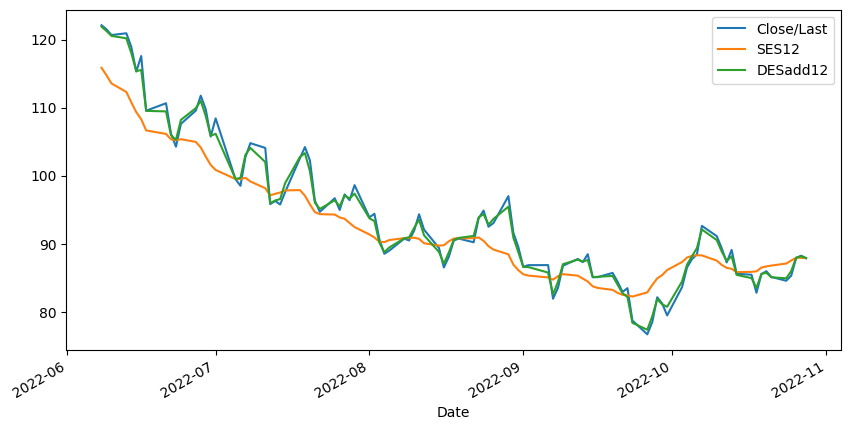

In [82]:
data[['Close/Last','SES12','DESadd12']].iloc[:100].plot(figsize=(10,5));

In [83]:
model = ExponentialSmoothing(data['Close/Last'], trend='add')
model_fit = model.fit()
data['DESmul12'] = model_fit.fittedvalues.shift(-1)
data.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Close/Last,Volume,Open,High,Low,SES12,DESadd12,DESmul12
Date,,,,,,,,
2022-10-28,87.90,241417.0,88.67,88.76,87.08,87.900000,87.905554,87.905554
2022-10-27,88.26,273717.0,88.26,89.79,87.33,87.954000,88.169136,88.169136
2022-10-26,87.91,271474.0,85.07,88.41,84.14,87.947400,87.975366,87.975366
2022-10-25,85.32,226337.0,84.88,86.03,83.06,87.553290,85.995495,85.995495
2022-10-24,84.58,238458.0,85.24,85.92,82.63,87.107297,84.939799,84.939799


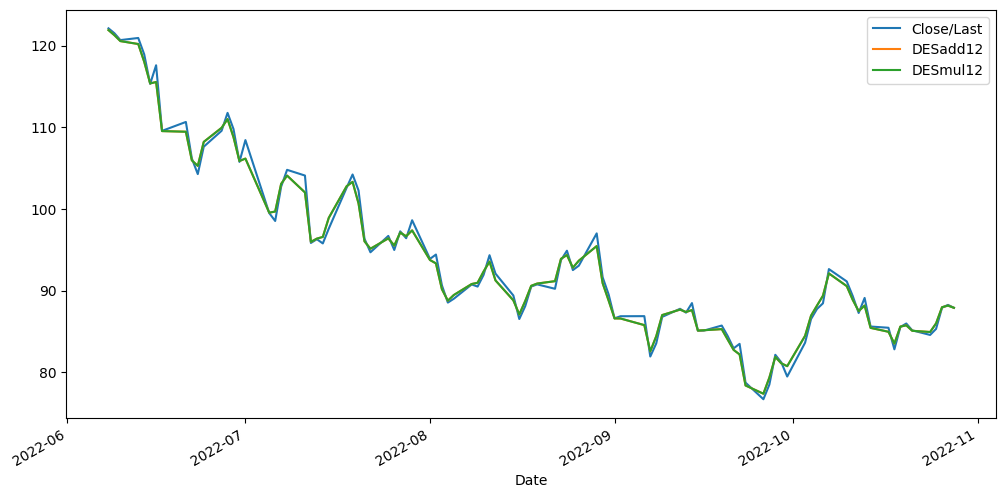

In [84]:
data[['Close/Last','DESadd12','DESmul12']].iloc[:100].plot(figsize=(12,6));

Triple Exponential Smoothing

In [85]:
data['TESadd12'] = ExponentialSmoothing(data['Close/Last'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Close/Last,Volume,Open,High,Low,SES12,DESadd12,DESmul12,TESadd12
Date,,,,,,,,,
2022-10-28,87.90,241417.0,88.67,88.76,87.08,87.900000,87.905554,87.905554,87.908024
2022-10-27,88.26,273717.0,88.26,89.79,87.33,87.954000,88.169136,88.169136,87.898709
2022-10-26,87.91,271474.0,85.07,88.41,84.14,87.947400,87.975366,87.975366,88.126943
2022-10-25,85.32,226337.0,84.88,86.03,83.06,87.553290,85.995495,85.995495,88.509910
2022-10-24,84.58,238458.0,85.24,85.92,82.63,87.107297,84.939799,84.939799,86.045440


In [86]:
model = ExponentialSmoothing(data['Close/Last'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
data['TESmul12'] = model_fit.fittedvalues
data.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Close/Last,Volume,Open,High,Low,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Date,,,,,,,,,,
2022-10-28,87.90,241417.0,88.67,88.76,87.08,87.900000,87.905554,87.905554,87.908024,87.908024
2022-10-27,88.26,273717.0,88.26,89.79,87.33,87.954000,88.169136,88.169136,87.898709,87.898709
2022-10-26,87.91,271474.0,85.07,88.41,84.14,87.947400,87.975366,87.975366,88.126943,88.126943
2022-10-25,85.32,226337.0,84.88,86.03,83.06,87.553290,85.995495,85.995495,88.509910,88.509910
2022-10-24,84.58,238458.0,85.24,85.92,82.63,87.107297,84.939799,84.939799,86.045440,86.045440


<Axes: xlabel='Date'>

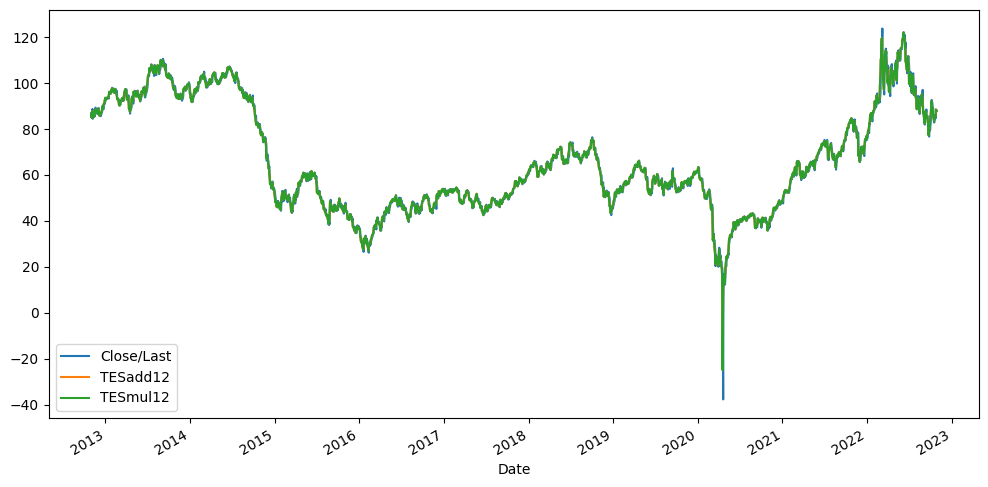

In [87]:
data[['Close/Last','TESadd12','TESmul12']].plot(figsize=(12,6))

<Axes: xlabel='Date'>

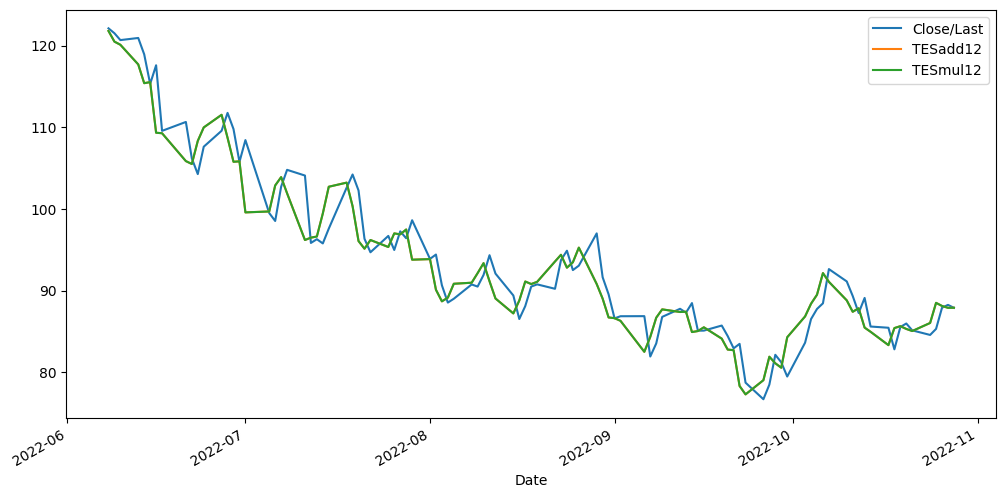

In [88]:
data[['Close/Last','TESadd12','TESmul12']].iloc[:100].plot(figsize=(12,6))

In [59]:
# saving the model
import pickle
from pickle import dump
pickle_out = open("reg.pkl", mode = "wb")
pickle.dump(model, pickle_out)
pickle_out.close()